<a href="https://colab.research.google.com/github/accenggg/Apriori-PDAB/blob/main/2109116063_Michael_Arselius_P_Tugas_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Michael Arselius Pamasi**

**NIM : 2109116063**

**Kelas : Sistem Informasi B 21**

# Apriori

## Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install mlxtend  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5956 sha256=df56532329030155b0534ef9563f405d475c16caeb1a0cd0f3a2a09cecb24c8a
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import datetime

## Code

## Data Preparation

In [5]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/PDAB/data_retail2.xlsx')

In [11]:
df = df[df['BRANCHNAME_SPLR']=='PALU']

In [12]:
df

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
3302,536618,2020-12-02 10:17:00,16,PALU,B3718,8717644054468,22952,BRUT EDT 100ML PASSION,PARFUM,48,...,17017.0,TK. REZKY / TOWUA,JL. TOWUA,SIGI,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
3303,536619,2020-12-02 10:18:00,16,PALU,B1430,7073025862,22960,BRUT EDT RANTAI 100ML,PARFUM,12,...,17017.0,KIOS A3 / BASRA,JL. BASUKI RAHMAT,SIGI,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
3307,536620,2020-12-02 10:27:00,16,PALU,B1899,8992694276019,21212,BRYL B.SPR COL 100ML C.SPIRIT,PARFUM,120,...,14135.0,KIOS NURFADILAH / KEDONDONG,JL. KEDONDONG,SIGI,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
3806,536685,2020-12-02 12:23:00,16,PALU,C3198,8991111112244,22803,C&C FAIRNESS CLEAN 100ML,KOSMETIK,2,...,17850.0,KIOS RIZKY STAND SAYUR,KAYUMALUE,SIGI,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
3813,536685,2020-12-02 12:23:00,16,PALU,C0012,8850007710035,21071,C&C OIL ABSOR REF WHIT,KOSMETIK,6,...,17850.0,KIOS IRFAN / DESTIK,JL. DEWI SARTIKA,SIGI,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276343,561040,2021-07-24 12:05:00,16,PALU,O0789,4902430216975,23301,OLAY NW HEALTHY UV BLOCK 50ML,BISKUIT,24,...,12431.0,MINI MARKET SAMARITAN,JL. TOWUA,PALU,SULAWESI TENGAH,INDONESIA,42,Mini Market,160112,PT. MAHAKAM RATIH
276344,561040,2021-07-24 12:05:00,16,PALU,O0785,8997006400069,85114B,OIL PASTELS 48W MEME,STATIONERY,6,...,12431.0,KIOS USWA / ANOA,JL. ANOA,PALU,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
276345,561040,2021-07-24 12:05:00,16,PALU,O0784,8992857020541,85114C,ONE PUSH ORANGE 60HARI,TANDAS,6,...,12431.0,KIOS CINDY / S.MANONDA,JL. S. MANONDA,PALU,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
276346,561040,2021-07-24 12:05:00,16,PALU,O0779,8992753018987,84988,OVALTINE 3IN1 12SX33G,SUSU,12,...,12431.0,LAPAK SAYUR ULFIA,JL. JATI,PALU,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH


In [13]:
df.dtypes

InvoiceNo                      object
InvoiceDate            datetime64[ns]
BRANCH_SPLR                     int64
BRANCHNAME_SPLR                object
warehouseProductsID            object
BARCODEID                       int64
StockCode                      object
PRODUCT                        object
PRODUCT_CATEGORY               object
Quantity                        int64
UnitPrice                     float64
UnitPriceRupiah               float64
oldCUSTID                      object
CustomerID                    float64
CUSTNAME                       object
ADDRESS                        object
KOTA                           object
PROVINSI                       object
NEGARA                         object
CHANNELID_SPLR                  int64
CHANNELNAME_SPLR               object
SUBDISTID                       int64
SUBDIST_NAME                   object
dtype: object

In [14]:
df.describe()

,BRANCH_SPLR,BARCODEID,Quantity,UnitPrice,UnitPriceRupiah,CustomerID,CHANNELID_SPLR,SUBDISTID
count,1480.0,1.480000e+03,1480.000000,1480.000000,1.480000e+03,1217.000000,1480.000000,1480.0
mean,16.0,8.282611e+12,10.160135,3.563493,5.095795e+04,15010.465078,33.481081,160112.0
std,0.0,1.990293e+12,28.560234,13.554474,1.938290e+05,1728.882702,5.217738,0.0
min,16.0,1.370000e+02,-50.000000,0.000000,0.000000e+00,12431.000000,14.000000,160112.0
25%,16.0,8.888103e+12,1.000000,1.060000,1.515800e+04,13313.000000,32.000000,160112.0
50%,16.0,8.992931e+12,4.000000,2.080000,2.974400e+04,15033.000000,32.000000,160112.0
75%,16.0,8.996196e+12,10.000000,3.750000,5.362500e+04,16241.000000,32.000000,160112.0
max,16.0,9.889980e+12,720.000000,448.000000,6.406400e+06,18262.000000,91.000000,160112.0


In [17]:
df.nunique()

InvoiceNo              189
InvoiceDate            186
BRANCH_SPLR              1
BRANCHNAME_SPLR          1
warehouseProductsID    355
BARCODEID              355
StockCode              903
PRODUCT                355
PRODUCT_CATEGORY        35
Quantity                49
UnitPrice              121
UnitPriceRupiah        121
oldCUSTID              256
CustomerID             147
CUSTNAME               264
ADDRESS                188
KOTA                     3
PROVINSI                 1
NEGARA                   1
CHANNELID_SPLR          11
CHANNELNAME_SPLR        11
SUBDISTID                1
SUBDIST_NAME             1
dtype: int64

## 2. Data Pre-processing


### 2.1 Data Cleaning

In [24]:
df.head(3)

,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,CustomerID,CUSTNAME,ADDRESS,KOTA,PROVINSI,NEGARA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
3302,536618,2020-12-02 10:17:00,16,PALU,B3718,8717644054468,22952,BRUT EDT 100ML PASSION,PARFUM,48,...,17017.0,TK. REZKY / TOWUA,JL. TOWUA,SIGI,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
3303,536619,2020-12-02 10:18:00,16,PALU,B1430,7073025862,22960,BRUT EDT RANTAI 100ML,PARFUM,12,...,17017.0,KIOS A3 / BASRA,JL. BASUKI RAHMAT,SIGI,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH
3307,536620,2020-12-02 10:27:00,16,PALU,B1899,8992694276019,21212,BRYL B.SPR COL 100ML C.SPIRIT,PARFUM,120,...,14135.0,KIOS NURFADILAH / KEDONDONG,JL. KEDONDONG,SIGI,SULAWESI TENGAH,INDONESIA,32,Toko Kelontong,160112,PT. MAHAKAM RATIH


In [19]:
# Mengganti kolom PERIODE menjadi tipe data datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-19-ccc6afdd0501>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [20]:
# Clean up spaces in product description, product category and remove any rows that don't have a valid invoice
df['PRODUCT'] = df['PRODUCT'].str.strip()
df['PRODUCT_CATEGORY'] = df['PRODUCT_CATEGORY'].str.strip()

df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

<ipython-input-20-be41a5b1c190>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRODUCT'] = df['PRODUCT'].str.strip()
<ipython-input-20-be41a5b1c190>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRODUCT_CATEGORY'] = df['PRODUCT_CATEGORY'].str.strip()
<ipython-input-20-be41a5b1c190>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [22]:
# menghapus variabel inoviceNO yang diawali dengan huruf C pada invoice numbernya
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~(df['InvoiceNo'].str[0] == 'C')]

<ipython-input-22-83d237ed8fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceNo'] = df['InvoiceNo'].astype('str')


### 2.2 Data Transformation

In [44]:
basket = (df[df['PROVINSI'] =="SULAWESI TENGAH"].groupby(['InvoiceNo', 'PRODUCT_CATEGORY'])['Quantity'].count()\
                                      .unstack().reset_index().fillna(0)\
                                      .set_index('InvoiceNo'))
basket

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT RUMAH TANGGA,BISKUIT,BUMBU,COKELAT,DETERGEN,ELEKTRONIK,KAPAS,KECAP & SAUCE,KOSMETIK,...,PERMEN,PRODUCT BAYI,ROKOK,SABUN & SAMPHOO,SLAI/JAM,SNACK,STATIONERY,SUSU,TANDAS,TEH & KOPI
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561036,1.0,5.0,4.0,0.0,6.0,7.0,0.0,1.0,0.0,5.0,...,1.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,1.0,1.0
561037,0.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,...,3.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,1.0,3.0
561038,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Show a subset of columns
basket.iloc[:,[0,1,2,3,4,5,6,7]].head()

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT RUMAH TANGGA,BISKUIT,BUMBU,COKELAT,DETERGEN,ELEKTRONIK,KAPAS
InvoiceNo,,,,,,,,
536618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Melakukan proses encoding -> Mengubah data kebentuk angka, agar sistem atau komputer dapat memahami informasi dari dataset
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets

PRODUCT_CATEGORY,ALAT BANGUNAN,ALAT RUMAH TANGGA,BISKUIT,BUMBU,COKELAT,DETERGEN,ELEKTRONIK,KAPAS,KECAP & SAUCE,KOSMETIK,...,PERMEN,PRODUCT BAYI,ROKOK,SABUN & SAMPHOO,SLAI/JAM,SNACK,STATIONERY,SUSU,TANDAS,TEH & KOPI
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536685,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
536798,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561036,1,1,1,0,1,1,0,1,0,1,...,1,1,0,1,0,1,1,1,1,1
561037,0,1,1,0,0,1,0,0,0,1,...,1,0,0,1,0,1,1,0,1,1
561038,0,0,1,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0


## 3. Data Exploration

In [34]:
frequent_itemsets = apriori(basket_sets, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.178161,(ALAT RUMAH TANGGA)
1,0.264368,(BISKUIT)
2,0.149425,(COKELAT)
3,0.218391,(DETERGEN)
4,0.103448,(KECAP & SAUCE)
5,0.287356,(KOSMETIK)
6,0.126437,(MINUMAN)
7,0.160920,(OBATAN)
8,0.201149,(PARFUM)
9,0.114943,(PASTA & S-GIGI)


In [35]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BISKUIT),(DETERGEN),0.264368,0.218391,0.114943,0.434783,1.990847,0.057207,1.382847
1,(DETERGEN),(BISKUIT),0.218391,0.264368,0.114943,0.526316,1.990847,0.057207,1.553001
2,(KOSMETIK),(BISKUIT),0.287356,0.264368,0.114943,0.400000,1.513043,0.038975,1.226054
3,(BISKUIT),(KOSMETIK),0.264368,0.287356,0.114943,0.434783,1.513043,0.038975,1.260831
4,(OBATAN),(BISKUIT),0.160920,0.264368,0.120690,0.750000,2.836957,0.078148,2.942529
5,(BISKUIT),(OBATAN),0.264368,0.160920,0.120690,0.456522,2.836957,0.078148,1.543908
6,(BISKUIT),(PERMEN),0.264368,0.160920,0.103448,0.391304,2.431677,0.060906,1.378489
7,(PERMEN),(BISKUIT),0.160920,0.264368,0.103448,0.642857,2.431677,0.060906,2.059770
8,(BISKUIT),(SABUN & SAMPHOO),0.264368,0.241379,0.114943,0.434783,1.801242,0.051130,1.342175
9,(SABUN & SAMPHOO),(BISKUIT),0.241379,0.264368,0.114943,0.476190,1.801242,0.051130,1.404389


In [46]:
result1 = rules1[(rules1['lift'] >= 1) & 
               (rules1['confidence'] >= 0.7)]

apr_result = result1.sort_values(by='confidence', ascending=False)
apr_result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(SUSU),(BISKUIT),0.137931,0.264368,0.109195,0.791667,2.994565,0.072731,3.531034
4,(OBATAN),(BISKUIT),0.160920,0.264368,0.120690,0.750000,2.836957,0.078148,2.942529


Melakukan filter untuk nilai lift ratio lebih dari sama dengan 1 dengan tingkat confidence minimal 0.7 (lebih dari sama dengan 70%)

In [47]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=2)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(OBATAN),(BISKUIT),0.160920,0.264368,0.120690,0.750000,2.836957,0.078148,2.942529
1,(BISKUIT),(OBATAN),0.264368,0.160920,0.120690,0.456522,2.836957,0.078148,1.543908
2,(BISKUIT),(PERMEN),0.264368,0.160920,0.103448,0.391304,2.431677,0.060906,1.378489
3,(PERMEN),(BISKUIT),0.160920,0.264368,0.103448,0.642857,2.431677,0.060906,2.059770
4,(BISKUIT),(SNACK),0.264368,0.218391,0.143678,0.543478,2.488558,0.085943,1.712096
5,(SNACK),(BISKUIT),0.218391,0.264368,0.143678,0.657895,2.488558,0.085943,2.150309
6,(SUSU),(BISKUIT),0.137931,0.264368,0.109195,0.791667,2.994565,0.072731,3.531034
7,(BISKUIT),(SUSU),0.264368,0.137931,0.109195,0.413043,2.994565,0.072731,1.468710
8,(DETERGEN),(SABUN & SAMPHOO),0.218391,0.241379,0.120690,0.552632,2.289474,0.067975,1.695740
9,(SABUN & SAMPHOO),(DETERGEN),0.241379,0.218391,0.120690,0.500000,2.289474,0.067975,1.563218


In [48]:
result2 = rules2[ (rules2['lift'] >= 1) & 
                (rules2['confidence'] >= 0.7) ]

best_result = result2.sort_values(by='confidence', ascending=False)
best_result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(SUSU),(BISKUIT),0.137931,0.264368,0.109195,0.791667,2.994565,0.072731,3.531034
0,(OBATAN),(BISKUIT),0.160920,0.264368,0.120690,0.750000,2.836957,0.078148,2.942529


## 4. Interpretation

Produk-produk yang dibeli secara bersamaan oleh customer di daerah **SULAWESI TENGAH** terhadap rule asosiasi pada dataset dengan min_support 0.1 / 10%, min_threshold = 1, dan nilai lift sebesar lebih dari samadengan 1 serta tingkat confidence minimal yang diperhitungkan sebesar 0.7 (70%) adalah: 
- **sabun** dengan **biskuit**.
- **obat-obatan** dengan **biskuit**.
<br>
<br>

In [43]:
# check barang kedua untuk kombinasi barang pertama
# pairing kombinasi dari pembelian produk pertama yang paling banyak untuk barang kedua adalah

apr_result['consequents'].value_counts()

(BISKUIT)    2
Name: consequents, dtype: int64

# **2. Three Month Customer Life Time Value**

In [50]:
# Import dataset
df = pd.read_excel('/content/drive/MyDrive/PDAB/data_retail2.xlsx')


In [51]:
df = df[df['BRANCHNAME_SPLR']=='PALU']

In [52]:
product_df = df.value_counts()
product_df = pd.DataFrame(product_df)
product_df

0
InvoiceNo InvoiceDate         BRANCH_SPLR BRANCHNAME_SPLR warehouseProductsID BARCODEID     StockCode PRODUCT                         PRODUCT_CATEGORY Quantity UnitPrice UnitPriceRupiah oldCUSTID CustomerID CUSTNAME                 ADDRESS                   KOTA PROVINSI        NEGARA    CHANNELID_SPLR CHANNELNAME_SPLR SUBDISTID SUBDIST_NAME        
536618    2020-12-02 10:17:00 16          PALU            B3718               8717644054468 22952     BRUT EDT 100ML PASSION          PARFUM            48      0.55      7865.0          1611189   17017.0    TK. REZKY / TOWUA        JL. TOWUA                 SIGI SULAWESI TENGAH INDONESIA 32             Toko Kelontong   160112    PT. MAHAKAM RATIH  1
561025    2021-07-24 10:37:00 16          PALU            T1184               8886363210193 84970S    TWIN CAPE JEM 450GR MIXED FRUIT MAKANAN PAGI      4       0.85      12155.0         1611041   16241.0    KIOS BELAWA MAJU/LASOSO  JL. LASOSO                PALU SULAWESI TENGAH INDONESIA 32             Toko Kelontong   160112    PT. MAHAKAM RATIH  1
561026    2021-07-24 10:49:00 16          PALU            C0014               8850007700050 21976     C&C OIL CNTRL FILM 50S          KOSMETIK          2       0.55      7865.0          1611201   17265.0    AYU / ABA KURA           JL. TANGGUL SELATAN       SIGI SULAWESI TENGAH INDONESIA 32             Toko Kelontong   160112    PT. MAHAKAM RATIH  1
                                                          C0012               8850007710035 23307     C&C OIL ABSOR REF WHIT          KOSMETIK          1       0.55      7865.0          1611203   17265.0    KIOS IRFAN / DESTIK      JL. DEWI SARTIKA          SIGI SULAWESI TENGAH INDONESIA 32             Toko Kelontong   160112    PT. MAHAKAM RATIH  1
                                                          B3718               8717644054468 21179     BRUT EDT 100ML PASSION          PARFUM            5       0.39      5577.0          1611189   17265.0    TK. REZKY / TOWUA        JL. TOWUA                 SIGI SULAWESI TENGAH INDONESIA 32             Toko Kelontong   160112    PT. MAHAKAM RATIH  1
...                                                                                                                                                                                                                                                                                                                                                          ..
548185    2021-03-29 14:58:00 16          PALU            M1419               733894223032  21232     MONICA CAKE 410 LEGIT           BISKUIT           12      1.25      17875.0         1611228   15628.0    TK. BUMEN JAYA           JL SOEPRAPTO NO. 40C PALU SIGI SULAWESI TENGAH INDONESIA 34             Grossier         160112    PT. MAHAKAM RATIH  1
                                                          M1416               733894221069  84978     MONICA L.LEGIT 1200G COKLAT     BISKUIT           12      1.25      17875.0         1611227   15628.0    RM. RIFA / TANGGUL       JL. TANGGUL SELATAN PALU  SIGI SULAWESI TENGAH INDONESIA 44             Restaurant       160112    PT. MAHAKAM RATIH  1
                                                          L2346               8992727004084 85123A    L ULTRA SLIM WING 9S            TEH & KOPI        12      2.95      42185.0         70114     15628.0    KIOS DONI / MAMBORO      MAMBORO                   PALU SULAWESI TENGAH INDONESIA 32             Toko Kelontong   160112    PT. MAHAKAM RATIH  1
                                                          L2345               8998777140475 22077     LAXING TEA JASMINE 15S          MINUMAN           12      1.65      23595.0         1611134   15628.0    PT. BUMI NYIUR SWALAYAN. JL. S. PARMAN             PALU SULAWESI TENGAH INDONESIA 32             Toko Kelontong   160112    PT. MAHAKAM RATIH  1
C561019   2021-07-22 16:52:00 16          PALU            L2345               8998777140475 21205     LAXING TEA JASMINE 15S  

In [53]:
df.shape

(1480, 23)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 3302 to 276347
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   InvoiceNo            1480 non-null   object        
 1   InvoiceDate          1480 non-null   datetime64[ns]
 2   BRANCH_SPLR          1480 non-null   int64         
 3   BRANCHNAME_SPLR      1480 non-null   object        
 4   warehouseProductsID  1480 non-null   object        
 5   BARCODEID            1480 non-null   int64         
 6   StockCode            1480 non-null   object        
 7   PRODUCT              1480 non-null   object        
 8   PRODUCT_CATEGORY     1480 non-null   object        
 9   Quantity             1480 non-null   int64         
 10  UnitPrice            1480 non-null   float64       
 11  UnitPriceRupiah      1480 non-null   float64       
 12  oldCUSTID            1480 non-null   object        
 13  CustomerID           1217 no

In [55]:
# Mengganti kolom PERIODE menjadi tipe data datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [56]:
# melihat range/rentang waktu dari data yang digunakan
print('Date Range: %s to %s' % (df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date Range: 2020-12-02 10:17:00 to 2021-07-24 12:05:00


In [57]:
df['Sales']=df['Quantity']*df['UnitPriceRupiah']

In [58]:
df['Sales']

3302       377520.0
3303       643500.0
3307       720720.0
3806      1022450.0
3813        90948.0
            ...    
276343     566280.0
276344     141570.0
276345     141570.0
276346     248820.0
276347     248820.0
Name: Sales, Length: 1480, dtype: float64

In [59]:
# mendapat order summary dataset yang menunjukkan total penjualan yang dilakukan per faktur pelanggan (customer invoice)
orders_df = df.groupby(['CustomerID','InvoiceNo']).agg({'Sales': sum,'InvoiceDate': max})

In [60]:
orders_df

,,Sales,InvoiceDate
CustomerID,InvoiceNo,,
12431.0,561040,5289570.0,2021-07-24 12:05:00
12451.0,541518,1052051.0,2021-01-19 09:05:00
12472.0,561037,8753030.0,2021-07-24 11:55:00
12484.0,540469,772915.0,2021-01-07 14:04:00
12490.0,561029,5904899.0,2021-07-24 11:25:00
...,...,...,...
17980.0,539046,1866150.0,2020-12-15 15:50:00
18075.0,541996,1759329.0,2021-01-25 10:20:00
18077.0,541997,121550.0,2021-01-25 10:38:00


In [61]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 155 entries, (12431.0, 561040) to (18262.0, 561010)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        155 non-null    float64       
 1   InvoiceDate  155 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8+ KB


In [62]:
# membuat sebuah simple functions yang dapat kita gunakan untuk membuat our summary dataframe
def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    '''returns the average days between sales'''
    return (x.max() - x.min()).days/x.count()

groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

summary_df = orders_df.reset_index().groupby('CustomerID').agg({'Sales': [min, max, sum, groupby_mean, groupby_count],\
                                                            'InvoiceDate': [min, max, purchase_duration, avg_frequency]})

In [63]:
summary_df.head(10)

Sales                                         \
                  min        max        sum        avg count   
CustomerID                                                     
12431.0     5289570.0  5289570.0  5289570.0  5289570.0     1   
12451.0     1052051.0  1052051.0  1052051.0  1052051.0     1   
12472.0     8753030.0  8753030.0  8753030.0  8753030.0     1   
12484.0      772915.0   772915.0   772915.0   772915.0     1   
12490.0     5904899.0  5904899.0  5904899.0  5904899.0     1   
12540.0     1721720.0  1721720.0  1721720.0  1721720.0     1   
12627.0     4198766.0  4198766.0  4198766.0  4198766.0     1   
12637.0      860574.0   860574.0   860574.0   860574.0     1   
12681.0      145860.0   145860.0   145860.0   145860.0     1   
12705.0     1355640.0  1355640.0  1355640.0  1355640.0     1   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12431.0    2021-07-24 12:05:00 2021-07-24 12:05:00                 0   
12451.0    2021-01-19 09:05:00 2021-01-19 09:05:00                 0   
12472.0    2021-07-24 11:55:00 2021-07-24 11:55:00                 0   
12484.0    2021-01-07 14:04:00 2021-01-07 14:04:00                 0   
12490.0    2021-07-24 11:25:00 2021-07-24 11:25:00                 0   
12540.0    2021-01-11 12:25:00 2021-01-11 12:25:00                 0   
12627.0    2021-07-22 13:59:00 2021-07-22 13:59:00                 0   
12637.0    2021-01-20 10:48:00 2021-01-20 10:48:00                 0   
12681.0    2020-12-07 10:08:00 2020-12-07 10:08:00                 0   
12705.0    2020-12-17 15:58:00 2020-12-17 15:58:00                 0   

                               
           purchase_frequency  
CustomerID                     
12431.0                   0.0  
12451.0                   0.0  
12472.0                   0.0  
12484.0                   0.0  
12490.0                   0.0  
12540.0                   0.0  
12627.0                   0.0  
12637.0                   0.0  
12681.0                   0.0  
12705.0                   0.0

In [64]:
# Rename our columns by combinng it with the top row
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [65]:
summary_df.head()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12431.0,5289570.0,5289570.0,5289570.0,5289570.0,1,2021-07-24 12:05:00,2021-07-24 12:05:00,0,0.0
12451.0,1052051.0,1052051.0,1052051.0,1052051.0,1,2021-01-19 09:05:00,2021-01-19 09:05:00,0,0.0
12472.0,8753030.0,8753030.0,8753030.0,8753030.0,1,2021-07-24 11:55:00,2021-07-24 11:55:00,0,0.0
12484.0,772915.0,772915.0,772915.0,772915.0,1,2021-01-07 14:04:00,2021-01-07 14:04:00,0,0.0
12490.0,5904899.0,5904899.0,5904899.0,5904899.0,1,2021-07-24 11:25:00,2021-07-24 11:25:00,0,0.0


In [67]:
summary_df.groupby('sales_count').count()['sales_avg'][:20]

sales_count
1    139
2      8
Name: sales_avg, dtype: int64

In [69]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] > 0]
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
13798.0,-218790.0,1716000.0,1497210.0,748605.0,2,2020-12-10 15:01:00,2021-02-08 15:38:00,60,30.0
14800.0,60775.0,4042038.0,4102813.0,2051406.5,2,2020-12-12 10:48:00,2021-07-24 10:24:00,223,111.5
15290.0,866580.0,4016155.0,4882735.0,2441367.5,2,2020-12-15 16:03:00,2021-03-29 13:53:00,103,51.5
17228.0,145860.0,360360.0,506220.0,253110.0,2,2020-12-02 16:00:00,2020-12-07 10:06:00,4,2.0
17850.0,-161733.0,1204346.0,1042613.0,521306.5,2,2020-12-02 12:23:00,2021-02-10 14:38:00,70,35.0


Karena kami mencoba untuk mendapatkan waktu antara penjualan (diplot di sel berikutnya). Kita perlu menghilangkan pembelian tunggal. Itulah yang dilakukan baris ini.

summary_df = ringkasan_df.loc[summary_df['invoicedate_purchase_duration'] > 0]

Durasi pembelian yang sama dengan 0 menunjukkan bahwa hanya pembelian yang pernah dilakukan.

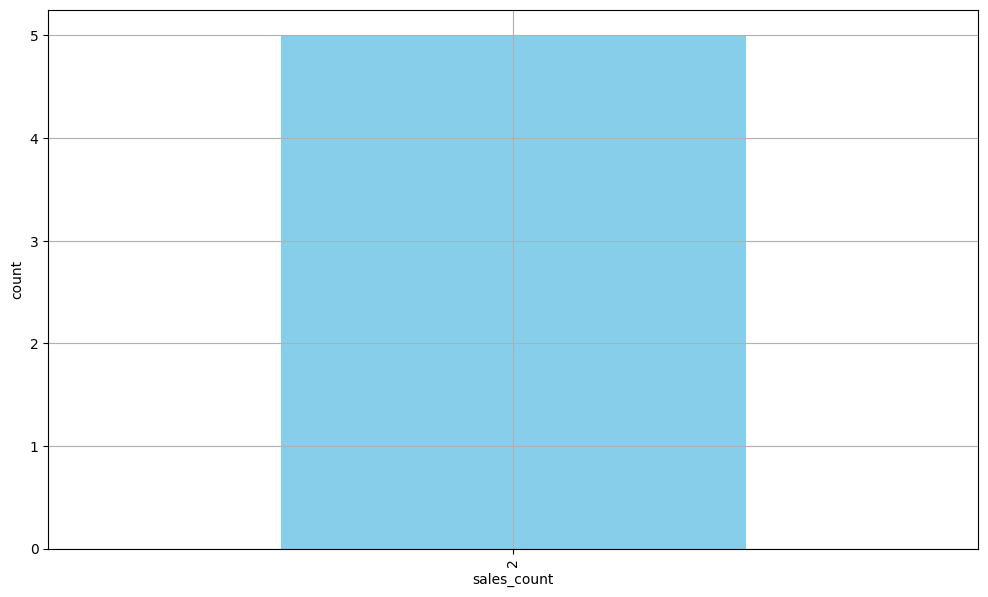

In [70]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration'] >= 0]

ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar', color='skyblue',figsize=(12,7), grid=True)

ax.set_ylabel('count')

plt.show()

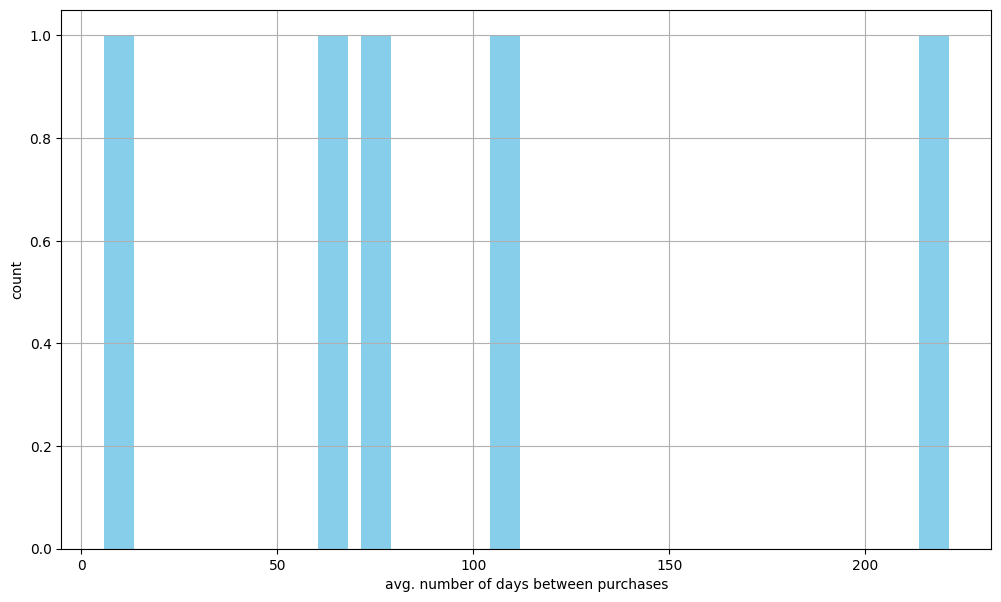

In [72]:
ax = summary_df['invoicedate_purchase_duration'].hist(bins=20, color='skyblue', rwidth=0.7, figsize=(12,7))

ax.set_xlabel('avg. number of days between purchases')
ax.set_ylabel('count')

plt.show()

# Predicting the 3 month Customer Lifetime Value

In [73]:
orders_df.head()

,,Sales,InvoiceDate
CustomerID,InvoiceNo,,
12431.0,561040,5289570.0,2021-07-24 12:05:00
12451.0,541518,1052051.0,2021-01-19 09:05:00
12472.0,561037,8753030.0,2021-07-24 11:55:00
12484.0,540469,772915.0,2021-01-07 14:04:00
12490.0,561029,5904899.0,2021-07-24 11:25:00


In [75]:
clv_freq = '3M'

data_df = orders_df.reset_index().groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq=clv_freq)]).agg({
    'Sales': [sum, groupby_mean, groupby_count],})

data_df.columns = ['_'.join(col).lower() for col in data_df.columns]
data_df = data_df.reset_index()
data_df

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count
0,12431.0,2021-09-30,5289570.0,5289570.0,1
1,12451.0,2021-03-31,1052051.0,1052051.0,1
2,12472.0,2021-09-30,8753030.0,8753030.0,1
3,12484.0,2021-03-31,772915.0,772915.0,1
4,12490.0,2021-09-30,5904899.0,5904899.0,1
...,...,...,...,...,...
146,17980.0,2020-12-31,1866150.0,1866150.0,1
147,18075.0,2021-03-31,1759329.0,1759329.0,1
148,18077.0,2021-03-31,121550.0,121550.0,1
149,18150.0,2021-09-30,2655510.0,2655510.0,1


In [76]:
date_month_map = {str(x)[:10]: 'M_%s' % (i+1) for i, x in enumerate(sorted(data_df.reset_index()['InvoiceDate'].unique(), reverse=True))}

data_df['M'] = data_df['InvoiceDate'].apply(lambda x: date_month_map[str(x)[:10]])
data_df.head()

,CustomerID,InvoiceDate,sales_sum,sales_avg,sales_count,M
0,12431.0,2021-09-30,5289570.0,5289570.0,1,M_1
1,12451.0,2021-03-31,1052051.0,1052051.0,1,M_2
2,12472.0,2021-09-30,8753030.0,8753030.0,1,M_1
3,12484.0,2021-03-31,772915.0,772915.0,1,M_2
4,12490.0,2021-09-30,5904899.0,5904899.0,1,M_1


In [77]:
data_df['M'].unique()

array(['M_1', 'M_2', 'M_3'], dtype=object)

**RFM**


Dalam pengertian yang diberikan, RFM mewakili:

- R(ecency): seberapa baru pelanggan melakukan pembelian?
- F(rquency): seberapa sering pelanggan melakukan pembelian?
- M(onetary Value): berapa banyak yang mereka belanjakan (setiap kali secara rata-rata)?

In [79]:
features_df = pd.pivot_table(data_df.loc[data_df['M'] != 'M_1'], values=['sales_sum', 'sales_avg', 'sales_count'], columns='M', index='CustomerID')

features_df.columns = ['_'.join(col) for col in features_df.columns]

features_df.head()

,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3
CustomerID,,,,,,
12451.0,1052051.0,NaN,1.0,NaN,1052051.0,NaN
12484.0,772915.0,NaN,1.0,NaN,772915.0,NaN
12540.0,1721720.0,NaN,1.0,NaN,1721720.0,NaN
12637.0,860574.0,NaN,1.0,NaN,860574.0,NaN
12681.0,NaN,145860.0,NaN,1.0,NaN,145860.0


In [80]:
response_df = data_df.loc[data_df['M'] == 'M_1', ['CustomerID', 'sales_sum']]

response_df.columns = ['CustomerID', 'CLV_'+clv_freq]
response_df.head()

,CustomerID,CLV_3M
0,12431.0,5289570.0
2,12472.0,8753030.0
4,12490.0,5904899.0
6,12627.0,4198766.0
13,12916.0,9915191.0


In [81]:
sample_set_df = features_df.merge(
    response_df, 
    left_index=True, 
    right_on='CustomerID',
    how='left'
)

sample_set_df = sample_set_df.fillna(0)
sample_set_df

,sales_avg_M_2,sales_avg_M_3,sales_count_M_2,sales_count_M_3,sales_sum_M_2,sales_sum_M_3,CustomerID,CLV_3M
NaN,1052051.0,0.0,1.0,0.0,1052051.0,0.0,12451.0,0.0
NaN,772915.0,0.0,1.0,0.0,772915.0,0.0,12484.0,0.0
NaN,1721720.0,0.0,1.0,0.0,1721720.0,0.0,12540.0,0.0
NaN,860574.0,0.0,1.0,0.0,860574.0,0.0,12637.0,0.0
NaN,0.0,145860.0,0.0,1.0,0.0,145860.0,12681.0,0.0
...,...,...,...,...,...,...,...,...
NaN,0.0,2393820.0,0.0,1.0,0.0,2393820.0,17838.0,0.0
NaN,-161733.0,1204346.0,1.0,1.0,-161733.0,1204346.0,17850.0,0.0
NaN,0.0,1866150.0,0.0,1.0,0.0,1866150.0,17980.0,0.0
NaN,1759329.0,0.0,1.0,0.0,1759329.0,0.0,18075.0,0.0


In [82]:
sample_set_df.shape

(108, 8)

# Using Linear Regression

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

target_var = 'CLV_'+clv_freq

# Our Features
all_features = [x for x in sample_set_df.columns if x not in ['CUSTID', target_var]]

# Split data in Train and Test
x_train, x_test, y_train, y_test = train_test_split(sample_set_df[all_features], sample_set_df[target_var], test_size=0.3)

# Fit Model
reg_fit = LinearRegression()
reg_fit.fit(x_train, y_train)

LinearRegression()

In [84]:
reg_fit.intercept_

339766.2719043498

1. Intersep (intercept) Intersep, definisi secara metematis adalah suatu titik perpotongan antara suatu garis dengan sumbu Y pada diagram/sumbu kartesius saat nilai X = 0. Sedangkan definisi secara statistika adalah nilai rata-ratapada variabel Y apabila nilai pada variabel X bernilai 0.

In [85]:
# Get our coefficents
reg_fit.coef_

array([-9.10519777e-02,  1.74522541e-02, -1.20416960e+05,  1.20416960e+05,
        9.07359860e-02, -1.91160363e-01, -1.44635945e+01])

In [86]:
coef = pd.DataFrame(list(zip(all_features, reg_fit.coef_)))
coef.columns = ['feature', 'coef']

coef

,feature,coef
0,sales_avg_M_2,-0.091052
1,sales_avg_M_3,0.017452
2,sales_count_M_2,-120416.960350
3,sales_count_M_3,120416.960352
4,sales_sum_M_2,0.090736
5,sales_sum_M_3,-0.191160
6,CustomerID,-14.463594


In [87]:
train_preds = reg_fit.predict(x_train)
test_preds = reg_fit.predict(x_test)

In [88]:
from sklearn.metrics import r2_score, median_absolute_error

print(r2_score(y_true=y_train, y_pred=train_preds))
print(median_absolute_error(y_true=y_train, y_pred=train_preds))

0.04555278758554682
29703.821209420625


In [89]:
print('In-Sample R-Squared: %0.4f' % r2_score(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample R-Squared: %0.4f' % r2_score(y_true = y_test, y_pred = test_preds))

In-Sample R-Squared: 0.0456
Out-of-Sample R-Squared: 0.0000


In [90]:
print('In-Sample MSE: %0.4f' % median_absolute_error(y_true = y_train, y_pred = train_preds))
print('Out-of-Sample MSE: %0.4f' % median_absolute_error(y_true = y_test, y_pred = test_preds))

In-Sample MSE: 29703.8212
Out-of-Sample MSE: 40937.6032


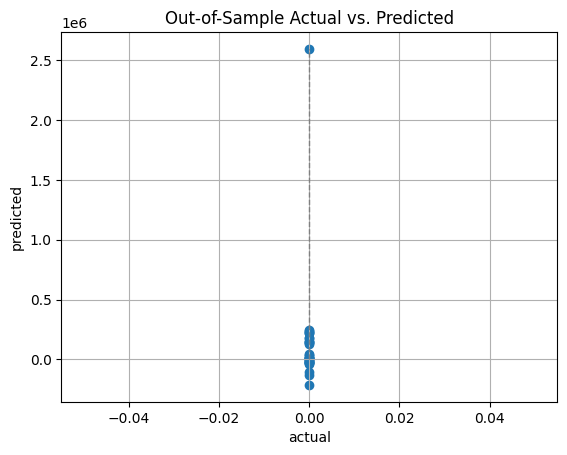

In [91]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)], color='gray', lw=1, linestyle='--')

plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()

plt.show()